# Problem Definition
F(x) = We are tasked with implementing simple linear regression to predict profits for a food truck

The chain already has trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in.

Reference: http://www.johnwittenauer.net/

In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

## Import training data

In [6]:
path = os.getcwd() + '/' + 'ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['X', 'Y'])  
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Data Plotting and Visualization

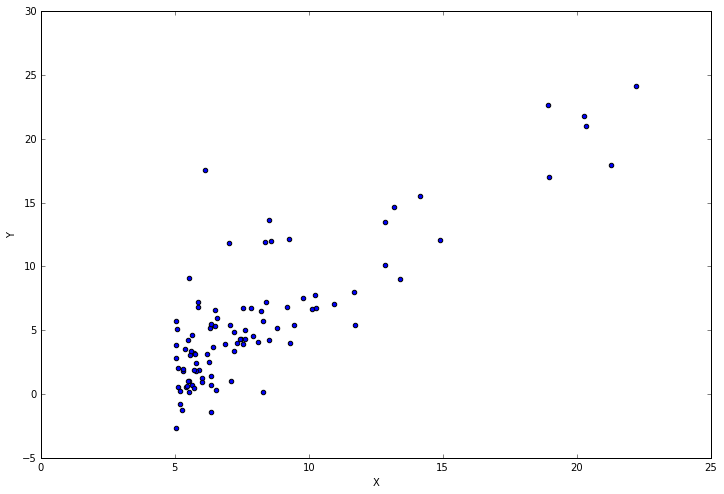

In [9]:
data.plot(kind='scatter', x='X', y='Y', figsize=(12,8))  

### Implementing Simple Linear Regression 

In [10]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [12]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

ValueError: cannot insert Ones, already exists

In [13]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0])) 

In [14]:
X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [15]:
computeCost(X, y, theta) 

32.072733877455676

In [17]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    Wtheta = np.zeros(shape=(iters,2))
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)
        Wtheta [i,0] = theta[0,0]
        Wtheta [i,1] = theta[0,1]
        #print (theta)     
    return Wtheta, cost

In [27]:
# initialize variables for learning rate and iterations
alpha = 0.1
iters = 1000

# perform gradient descent to "fit" the model parameters
#fig, ax = plt.subplots(figsize=(12,8))  
W, cost = gradientDescent(X, y, theta, alpha, iters)  

In [28]:
computeCost(X, y, theta)  

32.072733877455676

In [29]:
x = np.linspace(data.X.min(), data.X.max(), 10) 

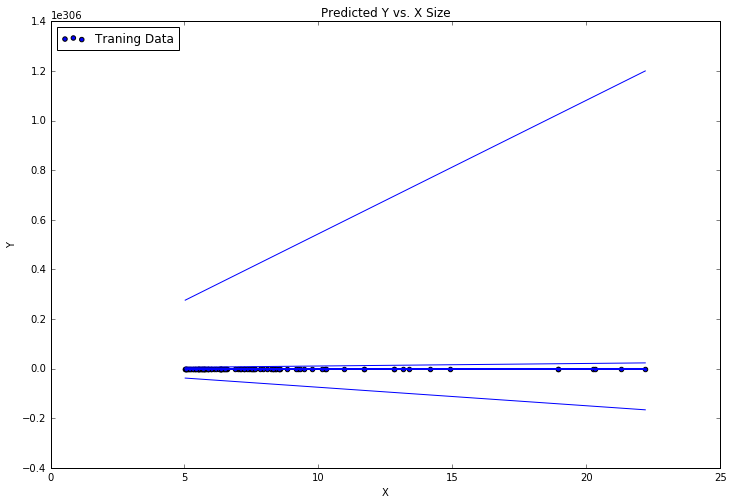

In [30]:
fig, ax = plt.subplots(figsize=(12,8)) 
for i in range(iters):
    f = W[i, 0] + (W[i, 1] * x)
    ax.plot(x, f, 'b') 
f = W[iters-1, 0] + (W[iters-1, 1] * x)
ax.plot(x, f,'r') 
ax.scatter(data.X, data.Y, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('X')  
ax.set_ylabel('Y')  
ax.set_title('Predicted Y vs. X Size')  

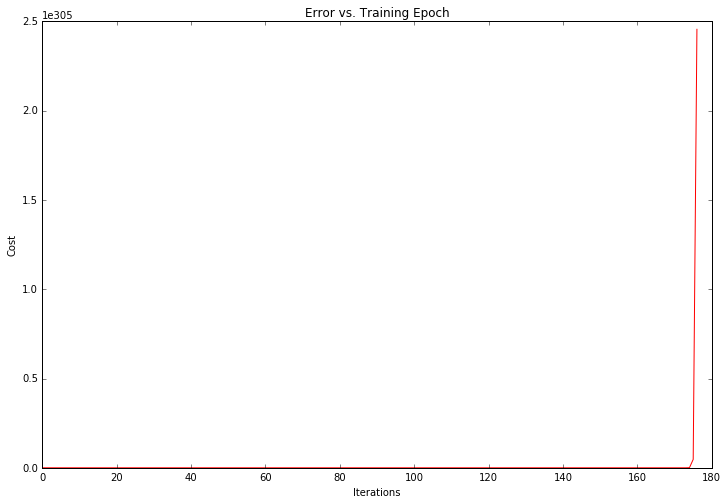

In [31]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 